In [1]:
import scanpy as sc

In [2]:
expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2.h5ad'
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 78464 × 32285
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'

In [3]:
adata.var

,gene_symbol
gene_identifier,
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992
ENSMUSG00000102331,Gm19938
ENSMUSG00000102343,Gm37381
ENSMUSG00000025900,Rp1
...,...
ENSMUSG00000095523,AC124606.1
ENSMUSG00000095475,AC133095.2
ENSMUSG00000094855,AC133095.1


In [4]:
# Update variable names to use gene symbols
adata.var_names = adata.var['gene_symbol']

In [5]:
adata.var_names_make_unique()

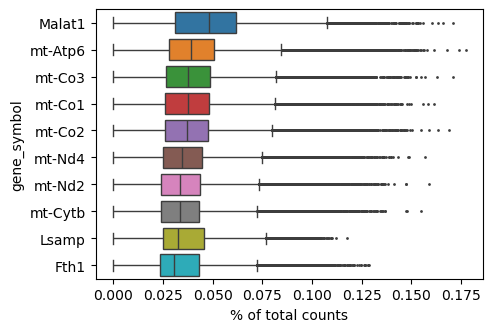

In [6]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 78464 × 26665
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label', 'n_genes'
    var: 'gene_symbol', 'n_cells'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'

In [8]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

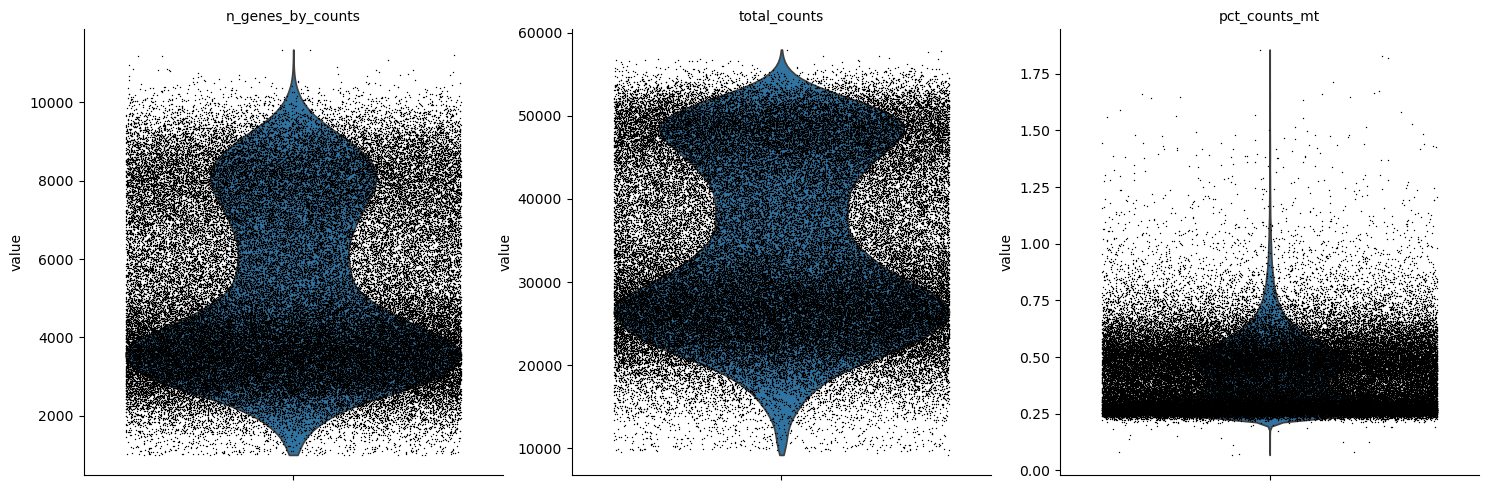

In [9]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

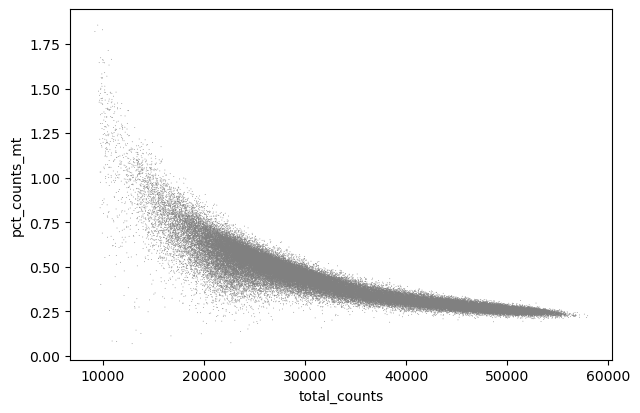

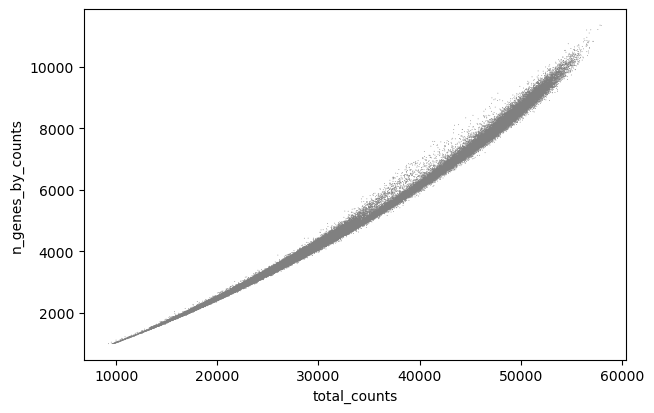

In [10]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [11]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

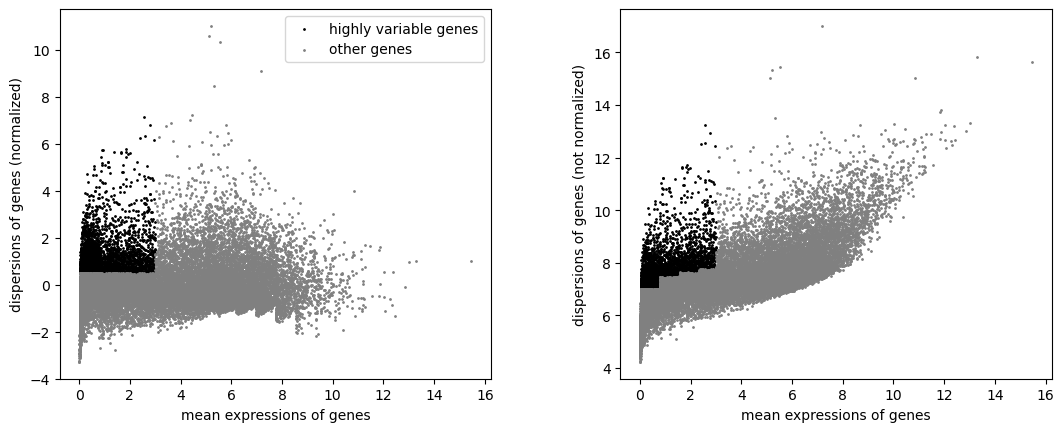

In [12]:
sc.pl.highly_variable_genes(adata)